In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm

In [2]:
!pip install scikit-learn-extra

     ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
     --- --------------------------------- 30.7/340.5 kB 660.6 kB/s eta 0:00:01
     ------------- ------------------------ 122.9/340.5 kB 1.4 MB/s eta 0:00:01
     ----------------------------- -------- 266.2/340.5 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 340.5/340.5 kB 2.4 MB/s eta 0:00:00


In [3]:
from sklearn_extra.cluster import KMedoids
from scipy.stats import wasserstein_distance

In [25]:
df = pd.read_csv('C:\\Users\\berna\\Documents\\Eskwelabs\\Capstone Project\\consolidated_csv_03ILIJAN_G01.csv')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
0,06/26/2021,RTD,CLUZ,SLUZON,03ILIJAN_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,SPPC,-10000.0,...,600.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,RTD,CLUZ,SLUZON,03ILIJAN_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,SPPC,-10000.0,...,600.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,RTD,CLUZ,SLUZON,03ILIJAN_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,SPPC,-10000.0,...,600.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,RTD,CLUZ,SLUZON,03ILIJAN_G01,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,SPPC,-10000.0,...,600.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,RTD,CLUZ,SLUZON,03ILIJAN_G01,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,SPPC,-10000.0,...,600.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Get Maximum Capacity from a different dict?

# Clean Time-stamp
(next time)

# Drop columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140361 entries, 0 to 140360
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RUN_TIME            140361 non-null  object 
 1   MKT_TYPE            140361 non-null  object 
 2   REGION_NAME         140361 non-null  object 
 3   ZONE_NAME           140361 non-null  object 
 4   RESOURCE_NAME       140361 non-null  object 
 5   TIME_INTERVAL       140361 non-null  object 
 6   START_TIME          140361 non-null  object 
 7   END_TIME            140361 non-null  object 
 8   MP_NAME             136631 non-null  object 
 9   PRICE1              140361 non-null  float64
 10  QUANTITY1           140361 non-null  float64
 11  PRICE2              140361 non-null  float64
 12  QUANTITY2           140361 non-null  float64
 13  PRICE3              17815 non-null   float64
 14  QUANTITY3           17815 non-null   float64
 15  PRICE4              540 non-null  

In [27]:
# Define the columns containing price-quantity pairs and timestamps
price_columns = [f'PRICE{i}' for i in range(1, 12)]
quantity_columns = [f'QUANTITY{i}' for i in range(1, 12)]

# Corrected line with tuple comprehension
selected_columns = ['RUN_TIME'] + [price for price in price_columns] + [quantity for quantity in quantity_columns]

In [28]:
# Apply the selection to the filtered DataFrame
result_df = df[selected_columns]
result_df

,RUN_TIME,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
0,06/26/2021,-10000.0,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140356,12/25/2022 11:35:00 PM,28000.0,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140357,12/25/2022 11:40:00 PM,28000.0,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140358,12/25/2022 11:45:00 PM,28000.0,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140359,12/25/2022 11:50:00 PM,28000.0,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df[selected_columns].describe()

,PRICE1,PRICE2,PRICE3,PRICE4,PRICE5,PRICE6,PRICE7,PRICE8,PRICE9,PRICE10,...,QUANTITY2,QUANTITY3,QUANTITY4,QUANTITY5,QUANTITY6,QUANTITY7,QUANTITY8,QUANTITY9,QUANTITY10,QUANTITY11
count,140361.000000,140361.000000,17815.000000,540.0,0.0,0.0,0.0,0.0,0.0,0.0,...,140361.000000,17815.000000,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5866.527397,5866.527397,16497.227518,32000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,432.984953,496.613079,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,18702.410962,18702.410962,8654.540535,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,107.438320,125.660205,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-10000.000000,-10000.000000,-500.000000,32000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,13.000000,288.000000,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-10000.000000,-10000.000000,10000.080000,32000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,380.000000,401.000000,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-10000.000000,-10000.000000,15000.080000,32000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,420.000000,585.000000,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,28000.080000,28000.080000,24000.080000,32000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,500.000000,600.000000,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,32000.000000,32000.000000,32000.000000,32000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,600.000000,600.000000,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#change Uppercase to lowercase
result_df.columns = result_df.columns.str.lower()

# FFill NaNs with last Price-Quantity Bid

In [31]:
# Forward fill from the first non-null value in each row for the price columns
result_df.loc[:, 'price1':'price11'] = result_df.loc[:, 'price1':'price11'].apply(lambda row: row.ffill(), axis=1)

# Forward fill from the first non-null value in each row for the quantity columns
result_df.loc[:, 'quantity1':'quantity11'] = result_df.loc[:, 'quantity1':'quantity11'].apply(lambda row: row.ffill(), axis=1)

## TAKES 30 SECONDS TO RUN
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140356,12/25/2022 11:35:00 PM,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0
140357,12/25/2022 11:40:00 PM,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0
140358,12/25/2022 11:45:00 PM,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0
140359,12/25/2022 11:50:00 PM,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0


In [32]:
result_df['run_time'] = result_df['run_time'].astype(str)

C:\Users\berna\AppData\Local\Temp\ipykernel_30112\2012798107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['run_time'] = result_df['run_time'].astype(str)


In [33]:
df_2022 = result_df[result_df['run_time'].str[6:10]=='2022']
df_2022.head(10)

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
38460,01/01/2022,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38461,01/01/2022 12:05:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38462,01/01/2022 12:10:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38463,01/01/2022 12:15:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38464,01/01/2022 12:20:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38465,01/01/2022 12:25:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38466,01/01/2022 12:30:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38467,01/01/2022 12:35:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38468,01/01/2022 12:40:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0
38469,01/01/2022 12:45:00 AM,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,...,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0,347.0


In [16]:
df_2022.describe()

,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
count,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,...,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000,62192.000000
mean,-9983.792128,-9983.792128,1215.796471,1719.234674,2347.137740,2381.181109,2387.032794,2388.046075,2388.094313,2388.094313,...,490.696247,538.437543,582.307322,613.518362,624.192163,627.920456,629.044539,629.138121,629.138121,629.138121
std,824.911442,824.911442,8769.925254,9022.607863,9607.103604,9649.704908,9653.128678,9653.804338,9653.838251,9653.838251,...,135.830753,114.579809,97.924711,79.982481,75.146033,73.469997,73.080573,73.041389,73.041389,73.041389
min,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
25%,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,350.000000,450.000000,550.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
50%,-10000.000000,-10000.000000,4582.690000,4998.970000,5000.080000,5000.080000,5000.080000,5000.080000,5000.080000,5000.080000,...,541.000000,563.200000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
75%,-10000.000000,-10000.000000,7550.080000,8150.080000,8890.080000,8900.080000,8900.080000,8900.080000,8900.080000,8900.080000,...,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
max,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000


In [42]:
# Assuming df is your DataFrame with price-quantity pairs in each row
test_df = df_2022

# Create empty lists to store data for all stepwise curves
all_quantities = []
all_prices = []
all_intp_quantities = []
all_intp_prices = []

# Iterate through each row
for index, row in tqdm(test_df.iterrows(), total=len(test_df), desc='Processing rows'):
    # Extract price and quantity columns for the current row
    prices = row.filter(like='price')
    quantities = row.filter(like='quantity')

    # Sort data by quantity
    sorted_data = sorted(zip(quantities, prices))
    quantities, prices = zip(*sorted_data)

    # Interpolate prices for regular quantity intervals
    step_fx = interp1d(quantities, prices, kind='previous', fill_value='extrapolate')
    step = df_2022['quantity11'].max() / 10

    # Create a finer quantity range for interpolation
    intp_quantities = np.arange(df_2022['quantity1'].min(), df_2022['quantity11'].max() + 1, step)
    
    # Get interpolated prices
    intp_prices = step_fx(intp_quantities)
    
    # Set a condition to handle quantities beyond the maximum in the raw data
    max_quantity_interval = max(quantities)
    intp_prices[intp_quantities > max_quantity_interval] = 33000
    
    # Append data to lists
    all_quantities.append(quantities)
    all_prices.append(prices)
    all_intp_quantities.append(intp_quantities)
    all_intp_prices.append(intp_prices)

Processing rows: 100%|██████████| 67103/67103 [02:21<00:00, 473.90it/s]


Processing:  26%|██▌       | 17511/67103 [32:18<1:31:30,  9.03it/s]


KeyboardInterrupt: 

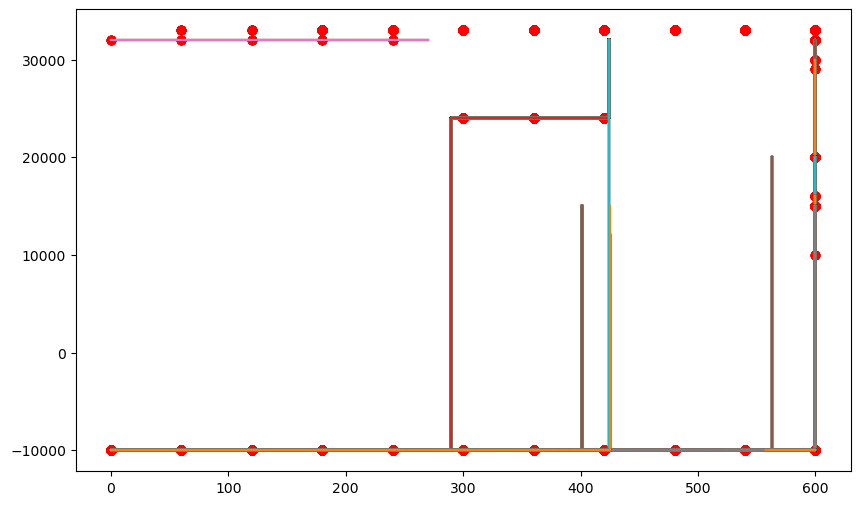

In [43]:
# Plot all stepwise curves on a single graph
plt.figure(figsize=(10, 6))

for quantities, prices, intp_quantities, intp_prices in tqdm(zip(all_quantities, all_prices, all_intp_quantities, all_intp_prices), total=len(all_quantities), desc='Processing'):
    plt.step(quantities, prices, where='post')
    plt.scatter(intp_quantities, intp_prices, color='red')

# Customize the plot as needed
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Stepwise Graphs and Interpolated Prices for All Rows')
plt.legend()
plt.show()

In [44]:
# Convert the interpolated prices into price series
price_series = np.array(all_intp_prices)
price_series

array([[-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       ...,
       [ 28000.,  28000.,  28000., ...,  33000.,  33000.,  33000.],
       [ 28000.,  28000.,  28000., ...,  33000.,  33000.,  33000.],
       [ 28000.,  28000.,  28000., ...,  33000.,  33000.,  33000.]])

In [45]:
# Specify the CSV file path
csv_file_path = 'consolidated_csv_03ILIJAN_G01_price_series.csv'

# Save the array to a CSV file
np.savetxt(csv_file_path, price_series, delimiter=',')

print(f"Array has been saved to {csv_file_path}")

Array has been saved to consolidated_csv_03ILIJAN_G01_price_series.csv


# K-Medoids

In [46]:
# Reshape the curves for K-medoids clustering
# curves_reshaped = price_series.reshape(500, -1)

# Number of clusters (you can choose an appropriate value for your case)
n_clusters = 3

# Function to calculate the Wasserstein distance between two curves
def curve_distance(curve1, curve2):
    curve1_flat = curve1.flatten()
    curve2_flat = curve2.flatten()
    distance = wasserstein_distance(curve1_flat, curve2_flat)
    return distance

# Initialize K-medoids model with Wasserstein distance metric
kmedoids = KMedoids(n_clusters=n_clusters, metric=curve_distance)

# Fit the model to the data
kmedoids.fit(price_series)

# Get cluster labels and cluster medoids
cluster_labels = kmedoids.labels_
cluster_medoids = kmedoids.cluster_centers_

# Visualize the clustering results (for simplicity, plotting only first two dimensions)
plt.scatter(price_series[:, 0], price_series[:, 1], c=cluster_labels, cmap='viridis')
#plt.scatter(cluster_medoids[:, 0], cluster_medoids[:, 1], c='red', marker='X', s=100, label='Medoids')
plt.legend()
plt.title('K-medoids Clustering of Cumulative Step-wise Curves using Wasserstein Distance')
plt.show()


MemoryError: Unable to allocate 33.5 GiB for an array with shape (67103, 67103) and data type float64

# K-Means

In [47]:
from sklearn.cluster import KMeans

# Assuming all_intp_prices_array is the array of interpolated prices

# Number of clusters (you can choose an appropriate value for your case)
n_clusters = 3

# Initialize K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(price_series)

# Get cluster labels
cluster_labels = kmeans.labels_

# Now, cluster_labels contains the assigned cluster for each row
# You can use these labels for further analysis or visualization

C:\Users\berna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
price_series

array([[-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       [-10000., -10000., -10000., ...,  33000.,  33000.,  33000.],
       ...,
       [ 28000.,  28000.,  28000., ...,  33000.,  33000.,  33000.],
       [ 28000.,  28000.,  28000., ...,  33000.,  33000.,  33000.],
       [ 28000.,  28000.,  28000., ...,  33000.,  33000.,  33000.]])

C:\Users\berna\AppData\Local\Temp\ipykernel_30112\617137922.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='variable', y='value', hue='Cluster_Labels', data=df_melted, marker='o', ci=None)


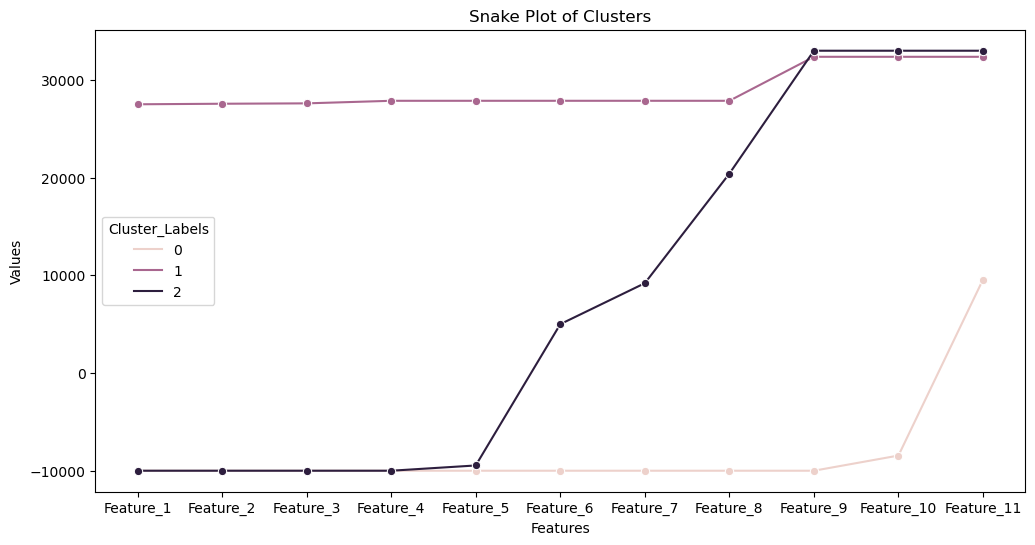

In [55]:
import seaborn as sns

# Create a DataFrame with the original data and cluster labels
df = pd.DataFrame(price_series, columns=[f'Feature_{i+1}' for i in range(price_series.shape[1])])
df['Cluster_Labels'] = cluster_labels

# Melt the DataFrame for the snake plot
df_melted = pd.melt(df, id_vars='Cluster_Labels', value_vars=df.columns[:-1])

# Create a snake plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='variable', y='value', hue='Cluster_Labels', data=df_melted, marker='o', ci=None)
plt.title('Snake Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# Normalization

In [11]:
result_df.describe()

,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
count,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,...,207770.00000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000,207770.000000
mean,-9982.411698,-9982.411698,2316.779508,2762.142137,4155.312328,4279.955689,4395.808245,4427.694484,4477.842781,4484.516733,...,435.95919,493.269000,533.512572,577.621379,596.280223,607.377567,613.690740,618.616923,621.056567,621.056567
std,778.696008,778.696008,7963.325252,8214.691674,9341.796726,9430.481023,9517.342538,9538.313994,9590.673331,9592.340360,...,143.29933,128.576812,113.663589,96.830962,87.253795,81.404479,77.698764,76.207518,76.376307,76.376307
min,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,180.00000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
25%,-10000.000000,-10000.000000,1764.930000,2213.620000,2213.620000,2213.620000,2213.620000,2213.620000,2213.620000,2213.620000,...,290.00000,350.000000,450.000000,550.000000,580.000000,580.000000,600.000000,647.000000,647.000000,647.000000
50%,-10000.000000,-10000.000000,4582.690000,4999.780000,5750.080000,6000.080000,6200.080000,6290.080000,6290.080000,6290.080000,...,450.00000,500.000000,550.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
75%,-10000.000000,-10000.000000,7533.080000,8320.080000,9300.080000,9475.080000,9500.080000,9520.080000,9550.080000,9550.080000,...,541.00000,620.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
max,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,...,647.00000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000


In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming result_df is your DataFrame
# If not, you can create it using pd.DataFrame(data)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Identify the quantity columns
quantity_columns = result_df.columns[result_df.columns.str.startswith('quantity')]

# Normalize and scale the quantity columns using MinMaxScaler
result_df.loc[:, quantity_columns] = scaler.fit_transform(result_df.loc[:, quantity_columns])

# Now, result_df has the quantity columns normalized and scaled to the range [0, 1]
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,...,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,...,0.773019,0.969379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207765,09/25/2023 11:35:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,0.149893,0.256959,0.364026,0.471092,0.578158,0.685225,0.792291,0.899358,1.0,1.0
207766,09/25/2023 11:40:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,0.149893,0.256959,0.364026,0.471092,0.578158,0.685225,0.792291,0.899358,1.0,1.0
207767,09/25/2023 11:45:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,0.149893,0.256959,0.364026,0.471092,0.578158,0.685225,0.792291,0.899358,1.0,1.0
207768,09/25/2023 11:50:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,...,0.149893,0.256959,0.364026,0.471092,0.578158,0.685225,0.792291,0.899358,1.0,1.0


# Clustering using K-Medoids

## clip result_df rows

In [13]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207770 entries, 0 to 207769
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   run_time    207770 non-null  object 
 1   price1      207770 non-null  float64
 2   price2      207770 non-null  float64
 3   price3      207770 non-null  float64
 4   price4      207770 non-null  float64
 5   price5      207770 non-null  float64
 6   price6      207770 non-null  float64
 7   price7      207770 non-null  float64
 8   price8      207770 non-null  float64
 9   price9      207770 non-null  float64
 10  price10     207770 non-null  float64
 11  price11     207770 non-null  float64
 12  quantity1   207770 non-null  float64
 13  quantity2   207770 non-null  float64
 14  quantity3   207770 non-null  float64
 15  quantity4   207770 non-null  float64
 16  quantity5   207770 non-null  float64
 17  quantity6   207770 non-null  float64
 18  quantity7   207770 non-null  float64
 19  qu

In [14]:
# Get the first 87194 rows
result_df_subset = result_df.head(87194)

In [15]:
# !pip install scikit-learn-extra

In [16]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract 'run_time' for later use
run_time_column = result_df_subset['run_time']

# Extract numerical columns for clustering
numerical_columns = result_df_subset.columns[1:]  # Assuming columns from 'price1' onwards are numerical

# Extract numerical data for clustering
data_for_clustering = result_df_subset[numerical_columns].values

# # Standardize the data (optional but often recommended for K-medoids)
# scaler = StandardScaler()
# data_for_clustering_standardized = scaler.fit_transform(data_for_clustering)

# Choose the number of clusters (you can adjust this)
n_clusters = 5

In [17]:
%%time
# # Run K-medoids clustering
# kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
# result_df['cluster'] = kmedoids.fit_predict(data_for_clustering)

# Testing k-means
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(data_for_clustering)

C:\Users\Gaea\anaconda3\envs\textparse\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: total: 2.08 s
Wall time: 407 ms


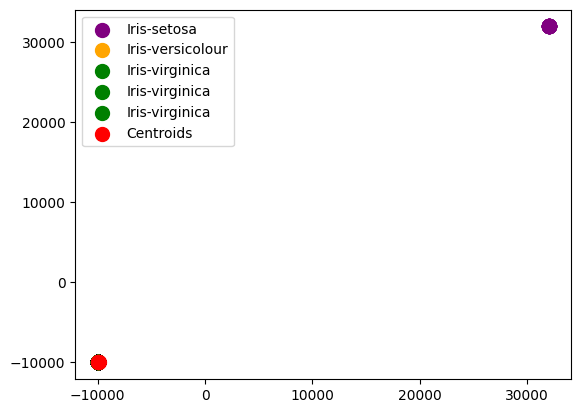

In [20]:
#Visualising the clusters
plt.scatter(data_for_clustering[y_kmeans == 0, 0], data_for_clustering[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(data_for_clustering[y_kmeans == 1, 0], data_for_clustering[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(data_for_clustering[y_kmeans == 2, 0], data_for_clustering[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(data_for_clustering[y_kmeans == 3, 0], data_for_clustering[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(data_for_clustering[y_kmeans == 4, 0], data_for_clustering[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [ ]:
# Now, result_df has a new 'cluster' column indicating the assigned cluster for each row

# You can explore the clusters or perform further analysis
# For example, print the medoid indices for each cluster
medoid_indices = kmedoids.medoid_indices_
print("Medoid indices for each cluster:", medoid_indices)

# Optionally, you can visualize the clusters using scatter plots
# Assuming you want to visualize based on 'price1' and 'quantity1'
plt.scatter(result_df['price1'], result_df['quantity1'], c=result_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('K-medoids Clustering')
plt.xlabel('Price1')
plt.ylabel('Quantity1')
plt.show()
